In [35]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd

In [37]:
import datetime as dt
import seaborn

# Reflect Tables into SQLAlchemy ORM

In [49]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime

In [50]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [51]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [52]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [53]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [54]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [60]:
#inspect measurement table
precip_data = session.query(Measurements).first()
precip_data.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11d585780>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [61]:
#inspect station table
first_station = session.query(Stations).first()
first_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11d59b630>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [64]:
#Design a query to retrieve the last 12 months of precipitation data
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

latest_date[0]

latest_list = latest_date[0].split("-")
latest_list[0] = str(int(latest_list[0]) - 1)
year_prior = "-".join(latest_list)
year_prior

'2016-08-23'

In [65]:
last_12 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_prior)
last_12

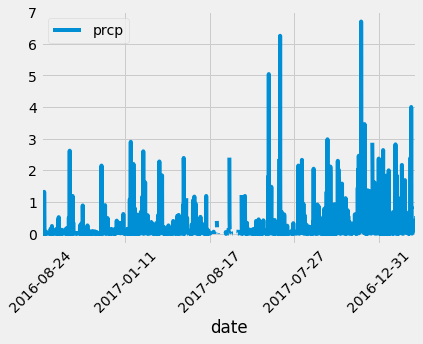

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [68]:
last_12_df = pd.read_sql_query(last_12.statement, engine, index_col="date")
last_12_df.head()

# Configure plot and ticks
last_12_df.plot(rot=45)
plt.show()


last_12_df.describe()

In [71]:
# Design a query to show how many stations are available in this dataset?
num_stations = session.query(Stations.station).count()
num_stations

#latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

9

In [72]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [74]:
most_active = active_stations[0][0]
most_active

'USC00519281'

In [78]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


most_active_temps = session.query(Measurement.tobs).filter(Measurement.date > year_prior, Measurement.station == most_active).all()
most_active_temps


[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 52., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

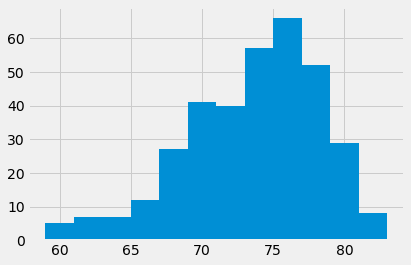

In [80]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temps[1][0]

active_temps = [x[0] for x in most_active_temps]
active_temps
active_temps = [x for (x), in most_active_temps]
active_temps

plt.hist(active_temps, bins=12)

In [83]:
# write function calc_temps, start date and end date in the format %Y-%m-%d 
#and return the minimum, average, and maximum temperatures for that range of dates.
import datetime
def calc_temps(date1,date2):

    start = datetime.datetime.strptime(date1, '%Y-%m-%d')
    end = datetime.datetime.strptime(date2, '%Y-%m-%d')

    temps_stats = session.query(func.avg(Measurement.tobs),func.min(Measurement.tobs),func.max(Measurement.tobs)).\
            filter(Measurement.date > start).\
            filter(Measurement.date < end).all()
    return(temps_stats)

In [84]:
calc_temps

<function __main__.calc_temps(date1, date2)>